In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep ="\t")

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

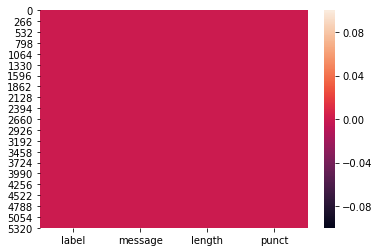

In [7]:
sns.heatmap(df.isnull())

In [8]:
len(df)

5572

In [10]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['length','punct']]
y = df['label']

In [16]:
X.head()

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2


In [17]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

## Split the dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

In [19]:
len(X_train)

3900

In [20]:
X_train.shape

(3900, 2)

In [22]:
y_test.shape

(1672,)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr_model = LogisticRegression(solver ='lbfgs')

In [33]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predict_value = lr_model.predict(X_test)

In [36]:
predict_value

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
from sklearn import metrics

In [41]:
print(metrics.confusion_matrix(y_test,predict_value))

[[1404   44]
 [ 219    5]]


In [50]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predict_value), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [53]:
print(metrics.classification_report(y_test,predict_value))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [54]:
print(metrics.accuracy_score(y_test,predict_value))

0.8427033492822966


In [58]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
nb_model = MultinomialNB()

In [62]:
nb_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
predictions = nb_model.predict(X_test)

In [64]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1438,10
spam,224,0


In [65]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [66]:
print(metrics.accuracy_score(y_test,predictions))

0.8600478468899522


In [67]:
from sklearn.svm import SVC

In [68]:
svc_model = SVC()

In [69]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
predict = svc_model.predict(X_test)

In [72]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predict), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1420,28
spam,186,38


In [73]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1448
        spam       0.58      0.17      0.26       224

    accuracy                           0.87      1672
   macro avg       0.73      0.58      0.60      1672
weighted avg       0.84      0.87      0.84      1672



In [74]:
print(metrics.accuracy_score(y_test,predict))

0.8720095693779905
